#### <center>Data Processing and Analysis in Python</center>
## <center>GROUP 17: Data-driven Healers</center>
# **<center>Healthcare Unmasked by Medilytics</center>**


<center><img src="https://i0.wp.com/timoelliott.com/blog/wp-content/uploads/2014/01/predictive-maintenance-health_thumb-1.jpg?w=640&ssl=1" /></center>


# Project Overview

Hospitals and the healthcare industry form a foundation in any society by providing critical care, diagnostic services, and life-saving treatments. Using the dataset of de-identified Inpatient Discharges from a myriad of New York Hospitals, we want to perform several analyses of the patient data, the diseases and their procedures, the financial aspect of the industry, etc. The dataset captures 12 GBs of New York discharge cases with analytics being performed on a resampled dataset of 2.4 GBs. A resampled version was created as 12 GBs would require a high RAM server.

Our project will give a comprehensive overview of the hospital data in New York over multiple years. We will capture the trends and changes within healthcare from 2009 to 2021 of specific diseases and procedures. The first analytics will capture the changes in diseases within specific demographics. The second analytics will capture the vulnerability changes of patients over the years. The last analytics will predict the discharge costs and capture the difference. The analytics will capture dynamics within the population which can be essential for healthcare planning, policymakers, healthcare administrators, and researchers.

We will provide an analysis that will serve as a vital tool for enhancing healthcare planning strategies, enabling informed resource allocation, and forming the foundation for evaluating the performance of New York's healthcare system. By identifying patterns and shifts in healthcare demands, this project will not only aid in optimizing healthcare delivery but also contribute to the overall improvement of public health in these crucial and populous states.


# Choice of Heavy Grading: Data Processing

####**Reasoning:**<br>
Our project should be graded more heavily on data processing due to the following reasons:
**Data Size:** The data processing includes performing data cleaning on dataset with 500000 rows for each year from 2009 to 2018 with 34 columns.
**Complex Standardization Process:** The task of mapping alphanumeric codes to numeric formats and employing rapidfuzz logic for description standardization goes beyond basic data processing. It involves intricate transformations and comparisons to ensure uniformity in the dataset.

####**Alphanumeric to Numeric Mapping:**<br>
The conversion of alphanumeric codes to numeric codes requires careful consideration of the alphanumeric patterns and their corresponding numeric formats.
When analyzing the data, we realized that the CCSR (Clinical Classification Software Refined) Diagnosis and Procedure Codes were alphanumeric for the years 2018 to 2021 while they were simply numeric for the years before 2018. On further researching about these, we realized that the codes were updated universally by the Healthcare Cost and Utilization Project, which is a Federal-State-Industry partnership sponsored by the Agency for Healthcare Research and Quality.

The transition went through several phases in its structure and format in which each transition served specific purposes addressing evolving needs in healthcare data management and standardization. The ICD-9 codes had a finite number of available codes and lacked the specificity needed to represent complex diagnoses and procedures accurately. ICD-10 provided a significantly broader range of alphanumeric codes, allowing for greater precision, specificity, and detailed classification of diseases, injuries, and medical procedures. To make it more granular, the ICD-10 codes were later updated to more structured alphanumeric codes. More than 80,000 ICD-10-PCS procedure codes were converted over 320 clinically meaningful categories. Similarly, around 70,000 diagnosis codes were mapped down to around 300 clinically meaningful categories.

####**Fuzzy Wuzzy Logic Implementation:**<br> The use of the rapidfuzz library and the creation of the calculate_similarity function showcase an advanced level of data processing. Utilized the rapidfuzz token_sort_ratio function to quantify the similarity between original and mapped descriptions. This advanced approach allowed us to select the most similar description from a group of multiple descriptions associated with a code, ensuring enhanced accuracy and consistency in the standardization process.


# Research Questions
1. **Demographic Influence on Disease and Treatment**: How do population demographics affect disease contraction? We will analyze variables such as age, gender and ethnicity to uncover patterns.
2. **Temporal Shifts in Disease Vulnerability**: How has the susceptibility of different demographic groups to certain diseases changed over time?
3. **Evolution of Treatment Methods**: How have the treatments administered for certain diseases evolved through the years? We will track changes in medical procedures and correlate them with advancements in medical technology and guidelines.
4. **Predicting Hospital Discharge Charges**: Can we develop a model to predict discharge charges more accurately, thereby reducing the gap between estimated and actual charges? This involves analyzing financial data related to patient care and hospital charges.


### **Installing and Importing the Libraries**

The notebook begins by importing necessary libraries such as pandas, which is crucial for data manipulation in Python. Additionally, it mounts a Google Drive folder, indicating that the data is being stored and accessed from Google Drive. We have also imported libraries for visualization such as Matplotlib, Seaborn. To compare the descriptions of old and new diagnosis and procedure, we have

In [ ]:
# installing the rapidfuzz library for text analysis
!pip install rapidfuzz

In [ ]:
#installing the lightgbm library for machine training
!pip install lightgbm

In [ ]:
# importing the library required for the project
import numpy as np
import pandas as pd
from numpy import nan

# google drive
from google.colab import drive
drive.mount('/content/gdrive')

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# text analysis
from rapidfuzz import fuzz

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **Importing and Sampling the Data** <strong><font color= 'red'>(DO NOT RUN!)</font></strong>
The data for this project comes from the "Hospital Inpatient Discharges (SPARCS De-Identified) Dataset" provided by the New York State Department of Health, which contains a rich and anonymized repository of healthcare information capturing the landscape of inpatient care in the state of New York. The dataset was downloaded as a CSV file from the website for the years 2009 to 2021. Following the reading of the files, we sampled the data to 500K observations for each year and saved the sampled data as 'discharge_year>.csv'. We reduced the dataset from 23 million to 6.5 million observations by sampling (=13*5,00,000).

In [ ]:
# Saving the csv file paths in the list named data
data = ["/content/gdrive/Shareddrives/medical_data/2009_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv", "/content/gdrive/Shareddrives/medical_data/2010_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv",
        "/content/gdrive/Shareddrives/medical_data/2011_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv", "/content/gdrive/Shareddrives/medical_data/2012_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv",
        "/content/gdrive/Shareddrives/medical_data/2013_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv", "/content/gdrive/Shareddrives/medical_data/2014_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv",
        "/content/gdrive/Shareddrives/medical_data/2015_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv", "/content/gdrive/Shareddrives/medical_data/2016_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv",
        "/content/gdrive/Shareddrives/medical_data/2017_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv", "/content/gdrive/Shareddrives/medical_data/2018_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv",
        "/content/gdrive/Shareddrives/medical_data/2019_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv", "/content/gdrive/Shareddrives/medical_data/2020_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv",
        "/content/gdrive/Shareddrives/medical_data/2021_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv"]

**Reading and Sampling Data:** <br>The notebook includes a loop for reading multiple CSV files from the specified directory on Google Drive. For each file, it samples 500,000 rows and saves them to a new file. This suggests a process of data reduction to manage large datasets.


In [ ]:
path = "/content/gdrive/Shareddrives/medical_data/"
for d in range(0,len(data)):
  # Reading the csv file
  df_temp = pd.read_csv(data[d])
  # Sampling each year's data into 500k observations
  df_temp = df_temp.sample(n=500000)
  # Saving the sampled data into new csv file
  df_temp.to_csv(path+'discharge_'+str(2009+d)+".csv")
# Deleting the temporary data
del df_temp

# Data Processing (RUN AFTER THESE BLOCKS)


In [ ]:
# Set the maximum number of columns displayed
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

In [ ]:
# reading the csv files to get the data from all the year and store it in different dataframes
discharge_2009_df = pd.read_csv("/content/gdrive/Shareddrives/medical_data/discharge_2009.csv")
discharge_2010_df = pd.read_csv("/content/gdrive/Shareddrives/medical_data/discharge_2010.csv")
discharge_2011_df = pd.read_csv("/content/gdrive/Shareddrives/medical_data/discharge_2011.csv")
discharge_2012_df = pd.read_csv("/content/gdrive/Shareddrives/medical_data/discharge_2012.csv")
discharge_2013_df = pd.read_csv("/content/gdrive/Shareddrives/medical_data/discharge_2013.csv")
discharge_2014_df = pd.read_csv("/content/gdrive/Shareddrives/medical_data/discharge_2014.csv")
discharge_2015_df = pd.read_csv("/content/gdrive/Shareddrives/medical_data/discharge_2015.csv")
discharge_2016_df = pd.read_csv("/content/gdrive/Shareddrives/medical_data/discharge_2016.csv")
discharge_2017_df = pd.read_csv("/content/gdrive/Shareddrives/medical_data/discharge_2017.csv", dtype={'Birth Weight':str})
discharge_2018_df = pd.read_csv("/content/gdrive/Shareddrives/medical_data/discharge_2018.csv")
discharge_2019_df = pd.read_csv("/content/gdrive/Shareddrives/medical_data/discharge_2019.csv")
discharge_2020_df = pd.read_csv("/content/gdrive/Shareddrives/medical_data/discharge_2020.csv", dtype={'Birth Weight':str})
discharge_2021_df = pd.read_csv("/content/gdrive/Shareddrives/medical_data/discharge_2021.csv", dtype={'Birth Weight':str})


# saving all the dataframe names as a list in a variable
dataframes = [discharge_2009_df,discharge_2010_df,discharge_2011_df, \
              discharge_2012_df,discharge_2013_df,discharge_2014_df, \
              discharge_2015_df,discharge_2016_df,discharge_2017_df, \
              discharge_2018_df,discharge_2019_df,discharge_2020_df,discharge_2021_df]

In [ ]:
# displaying the columns of the dataframe of 2021 year to check the column names
discharge_2021_df.columns

Index(['Unnamed: 0', 'Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [ ]:
# displaying the first five observations of teh 2021 discharge patients data
discharge_2021_df.head()

,Unnamed: 0,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,1593744,Central NY,Oneida,3202003.0,599.0,Faxton-St Lukes Healthcare St Lukes Division,0 to 17,134,M,White,Not Span/Hispanic,9,Urgent,Home or Self Care,2021,PNL014,NEONATAL ABSTINENCE SYNDROME,NaN,NaN,639,NEONATE BIRTH WEIGHT > 2499 GRAMS WITH OTHER S...,15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Self-Pay,NaN,NaN,02600,N,25497.06,10977.17
1,2023395,Capital/Adirond,Schenectady,4601001.0,829.0,Ellis Hospital,30 to 49,120,F,White,Not Span/Hispanic,2,Elective,Home or Self Care,2021,END009,OBESITY,GIS010,GASTRECTOMY,403,PROCEDURES FOR OBESITY,10,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...",2,Moderate,Minor,Surgical,Medicaid,Medicaid,NaN,NaN,N,59975.53,15432.00
2,1908836,New York City,Manhattan,7002054.0,1464.0,New York-Presbyterian Hospital - Columbia Pres...,30 to 49,115,F,White,Not Span/Hispanic,7,Emergency,Home or Self Care,2021,PRG018,MATERNAL CARE RELATED TO DISORDERS OF THE PLAC...,PGN001,FETAL HEART RATE MONITORING,566,ANTEPARTUM WITHOUT O.R. PROCEDURE,14,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",3,Major,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,88124.58,26153.47
3,562185,New York City,Manhattan,7002001.0,1438.0,Bellevue Hospital Center,30 to 49,113,F,Other Race,Spanish/Hispanic,3,Emergency,Home or Self Care,2021,DIG024,POSTPROCEDURAL OR POSTOPERATIVE DIGESTIVE SYST...,GIS004,GI SYSTEM ENDOSCOPY WITHOUT BIOPSY (DIAGNOSTIC),810,HEMORRHAGE OR HEMATOMA DUE TO COMPLICATION,21,"INJURIES, POISONINGS AND TOXIC EFFECTS OF DRUGS",2,Moderate,Moderate,Medical,Medicaid,NaN,NaN,NaN,Y,29932.95,17213.96
4,1877552,Finger Lakes,Livingston,2527000.0,393.0,Nicholas H. Noyes Memorial Hospital,50 to 69,144,F,White,Not Span/Hispanic,4,Emergency,Home or Self Care,2021,INF012,CORONAVIRUS DISEASE 2019 (COVID-19),ADM019,POTENTIAL COVID-19 THERAPIES,137,MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS,4,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3,Major,Major,Medical,Medicare,Medicaid,Private Health Insurance,NaN,Y,14490.68,3085.72


In [ ]:
# displaying the shape of the dataframes of each year
for i in range(len(dataframes)):
  print(dataframes[i].shape, 2009+i)

(500000, 35) 2009
(500000, 35) 2010
(500000, 35) 2011
(500000, 35) 2012
(500000, 35) 2013
(500000, 35) 2014
(500000, 35) 2015
(500000, 35) 2016
(500000, 35) 2017
(500000, 34) 2018
(500000, 34) 2019
(500000, 34) 2020
(500000, 34) 2021


After looking at the shape of the dataframe, we observed that the data of year 2018 to 2021 has one column lesser than the data from the other years. So, we wanted to figure out which columns are missing or not matching with other dataframes.

In [ ]:
# displaying the columns which are mismatching with the other dataframes
for i in range(0,len(dataframes)-1):
  print('\n')
  print(2009+i)
  for j in dataframes[i].columns:
    if j not in dataframes[-1].columns:
      print(j)



2009
Health Service Area
Facility ID
CCS Diagnosis Code
CCS Diagnosis Description
CCS Procedure Code
CCS Procedure Description
Source of Payment 1
Source of Payment 2
Source of Payment 3
Abortion Edit Indicator


2010
Health Service Area
Facility ID
CCS Diagnosis Code
CCS Diagnosis Description
CCS Procedure Code
CCS Procedure Description
Source of Payment 1
Source of Payment 2
Source of Payment 3
Abortion Edit Indicator


2011
Health Service Area
Facility ID
CCS Diagnosis Code
CCS Diagnosis Description
CCS Procedure Code
CCS Procedure Description
Abortion Edit Indicator


2012
Health Service Area
Facility ID
CCS Diagnosis Code
CCS Diagnosis Description
CCS Procedure Code
CCS Procedure Description
Abortion Edit Indicator


2013
Health Service Area
Facility ID
CCS Diagnosis Code
CCS Diagnosis Description
CCS Procedure Code
CCS Procedure Description
Abortion Edit Indicator


2014
Health Service Area
Facility ID
CCS Diagnosis Code
CCS Diagnosis Description
CCS Procedure Code
CCS Procedur

In [ ]:
# fixes dataframe from 2009 - 2017 columns to match 2021
for i in range(0,len(dataframes)-4):
  # change Facility Id/ID to Permanent Facility Id
  if 2009 + i in [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    dataframes[i] = dataframes[i].rename(columns={'Facility Id': 'Permanent Facility Id'})
    dataframes[i] = dataframes[i].rename(columns={'Facility ID': 'Permanent Facility Id'})
    dataframes[i] = dataframes[i].rename(columns={'Health Service Area': 'Hospital Service Area'})
  # change Source of Payment # to Payment Typology #
  if 2009 + i in [2009, 2010]:
    dataframes[i] = dataframes[i].rename(columns={'Source of Payment 1': 'Payment Typology 1',
                                                  'Source of Payment 2': 'Payment Typology 2',
                                                  'Source of Payment 3': 'Payment Typology 3'})
  # dropping the 'Abortion Edit Indicator' column as it is not available in the later years dataset
  dataframes[i] = dataframes[i].drop('Abortion Edit Indicator', axis=1)

  # renaming the CCS code and description column names to one name
  dataframes[i] = dataframes[i].rename(columns={'CCS Diagnosis Code': 'CCSR Diagnosis Code',
                                    'CCS Diagnosis Description': 'CCSR Diagnosis Description',
                                    'CCS Procedure Code': 'CCSR Procedure Code',
                                    'CCS Procedure Description': 'CCSR Procedure Description'})

# concatenating the dataframes of all years into one dataframe
df_2009to2021 = pd.concat(dataframes)

# deleting the dataframes to free up storage
del discharge_2009_df
del discharge_2010_df
del discharge_2011_df
del discharge_2012_df
del discharge_2013_df
del discharge_2014_df
del discharge_2015_df
del discharge_2016_df
del discharge_2017_df
del discharge_2018_df
del discharge_2019_df
del discharge_2020_df
del discharge_2021_df
del dataframes

In [ ]:
# Counting the number of null values in the dataframe
df_2009to2021.isnull().sum().sum()

10880659

On analyzing the null values in the dataset, we came to the following conclusion:
1. Changes in hospital locations, the opening of new hospitals, or incomplete reporting may result in missing data about service areas and counties.
2. There are also null values in the payment typology options (2 and 3) because most people pay using one payment method while very few people use multiple payment methods to pay the entire amount.
3. There are a higher number of null values in 'Birth Weight' because not all patients in the hospital were there for pregnancy delivery.
4. There may have been changes in the way zip codes are recorded or reported over time. Missing digits could be the result of changing data collection practices or reporting standards.
5. Changes in how patient outcomes are recorded or reported, variations in hospital discharge procedures, or updates to patient privacy regulations may all contribute to the absence of disposition information.
6. Changes in healthcare coding systems, severity assessment criteria updates, or reporting standards differences could result in missing data in these columns.


In [ ]:
# storing the number of null values in each facility
facility_null_counts = df_2009to2021.groupby('Facility Name').apply(lambda x: len(x[x.isna().any(axis=1)]))

# displaying the top 10 facilities with maximum number of null values
print(facility_null_counts.sort_values(ascending=False).head(10))

Facility Name
North Shore University Hospital           133865
Mount Sinai Hospital                       96575
Strong Memorial Hospital                   90211
Maimonides Medical Center                  87754
Lenox Hill Hospital                        84767
Staten Island University Hosp-North        84234
Albany Medical Center Hospital             79327
Rochester General Hospital                 76423
Long Island Jewish Medical Center          75262
Good Samaritan Hospital Medical Center     71471
dtype: int64


After carefully investigating the data, we realized that there are many facilities which have more than 70K of NaN values in its information of discharged patients. Hence, we conclude that these facilities are not storing the data properly.

In [ ]:
# Dropping Abortion data
df_2009to2021.drop(df_2009to2021[df_2009to2021['Facility Name'] == 'Abortion Record - Facility Name Redacted'].index,inplace=True)

In [ ]:
# Convert 'CCSR Diagnosis Description' values to title case
df_2009to2021['CCSR Diagnosis Description'] = df_2009to2021['CCSR Diagnosis Description'].map(lambda x: x.title() if isinstance(x, str) else x)

In [ ]:
# Convert 'APR DRG Description' values to title case
df_2009to2021['APR DRG Description'] = df_2009to2021['APR DRG Description'].map(lambda x: x.lower() if isinstance(x, str) else x)

In [ ]:
# Convert 'APR MDC Description' values to title case
df_2009to2021['APR MDC Description'] = df_2009to2021['APR MDC Description'].map(lambda x: x.title() if isinstance(x, str) else x)

In [ ]:
# Check unique values of 'Emergency Department Indicator' column
df_2009to2021['Emergency Department Indicator'].value_counts()

Y        3200395
N        2268629
True      589354
False     405014
Name: Emergency Department Indicator, dtype: int64

In [ ]:
# Converting True to Y and False to N
df_2009to2021['Emergency Department Indicator'] = df_2009to2021['Emergency Department Indicator'].replace({True: 'Y', False: 'N'})

In [ ]:
# final shape of the dataset after cleaning it
df_2009to2021.shape

(6463392, 34)

# Explaining the CCSR Codes mapping for Procedure and Diagnosis


Since, the CCSR codes have changed from the year 2018, we have to map it down to the old CCSR codes. It is tough to map the old CCSR codes to the new more specific and granular codes hence we are reversing the codes to the old system for convenience of this analysis.



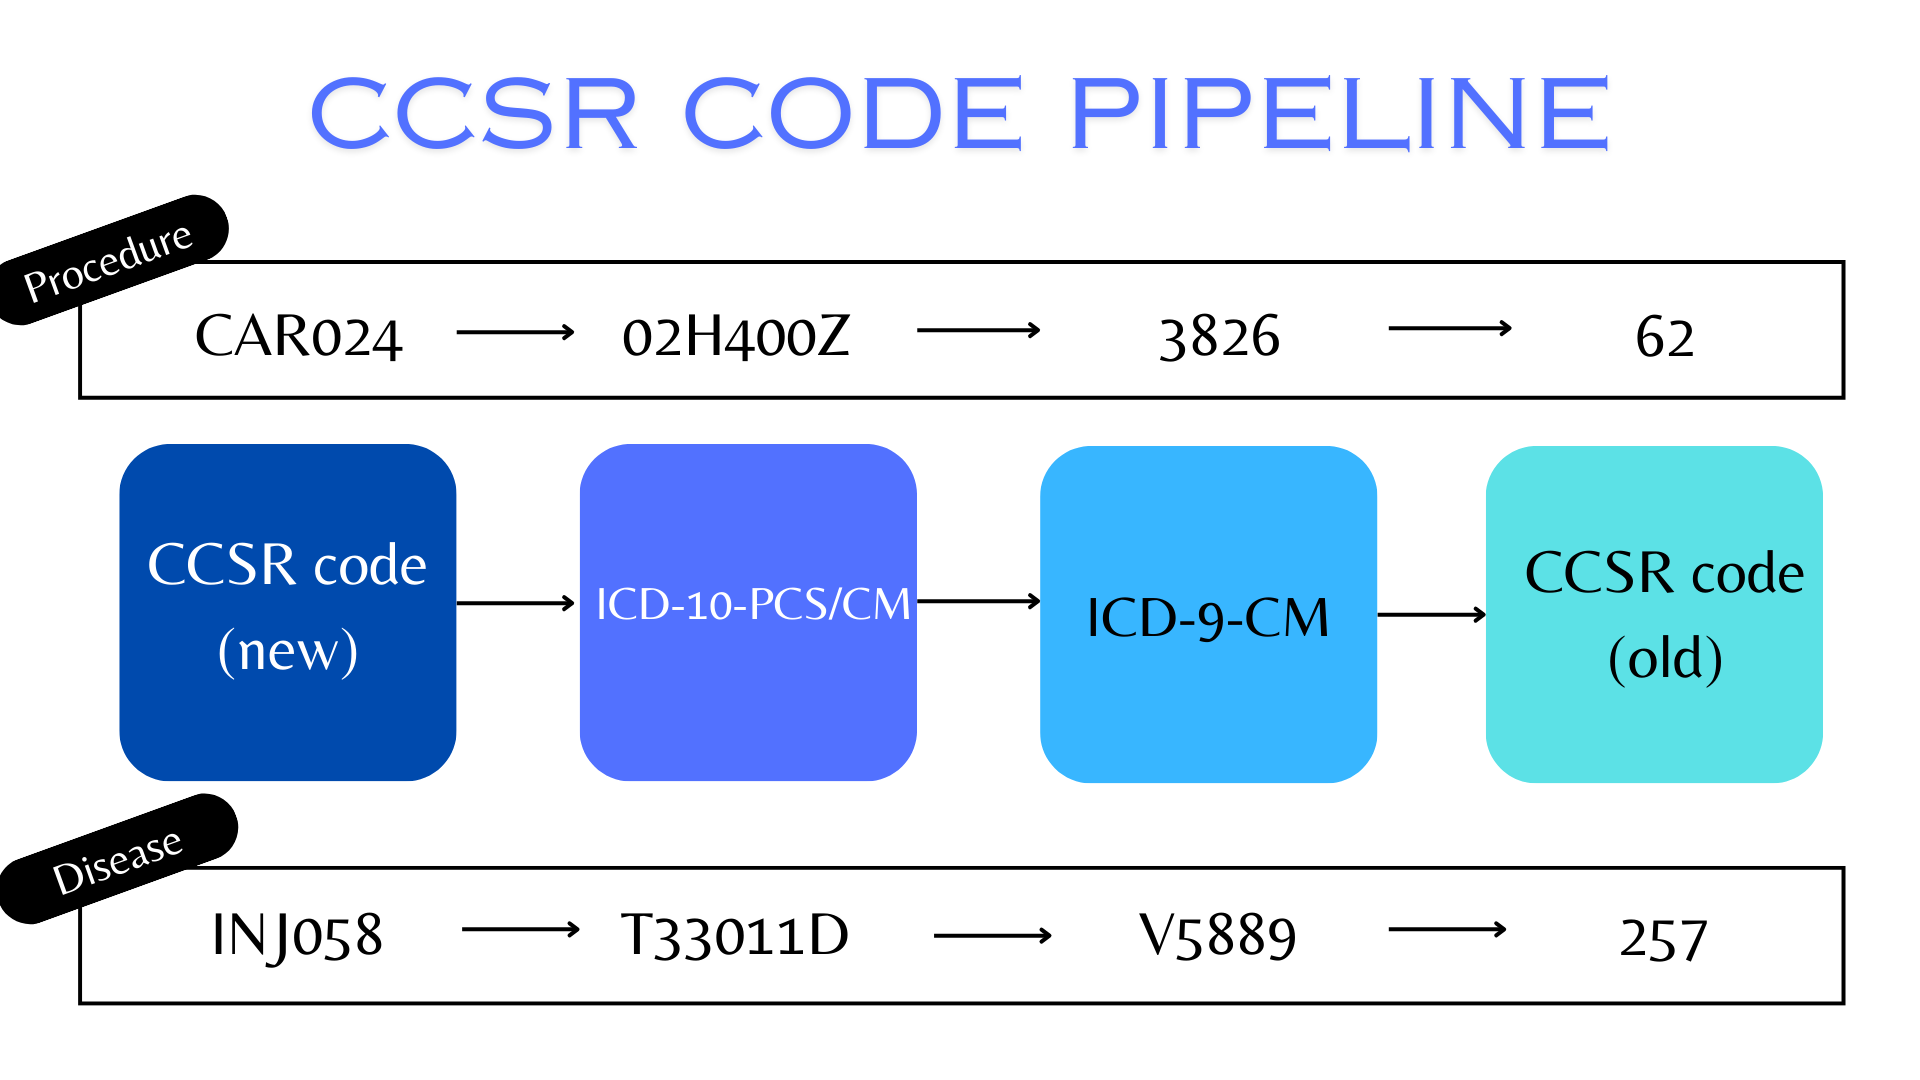

As shown above, in the snippet we mapped the 'CCSR Procedure Code' 'CAR024' in the 'df_2009to2021' DataFrame to an alphanumeric ICD-10-PCS code ('02H403Z'). This ICD-10-PCS number was then mapped to an ICD-9-CM code ('3699'). This stage was notable because it exposed a problem: several outdated "CCSR Procedure Codes" could correlate to a single ICD-9-CM code.



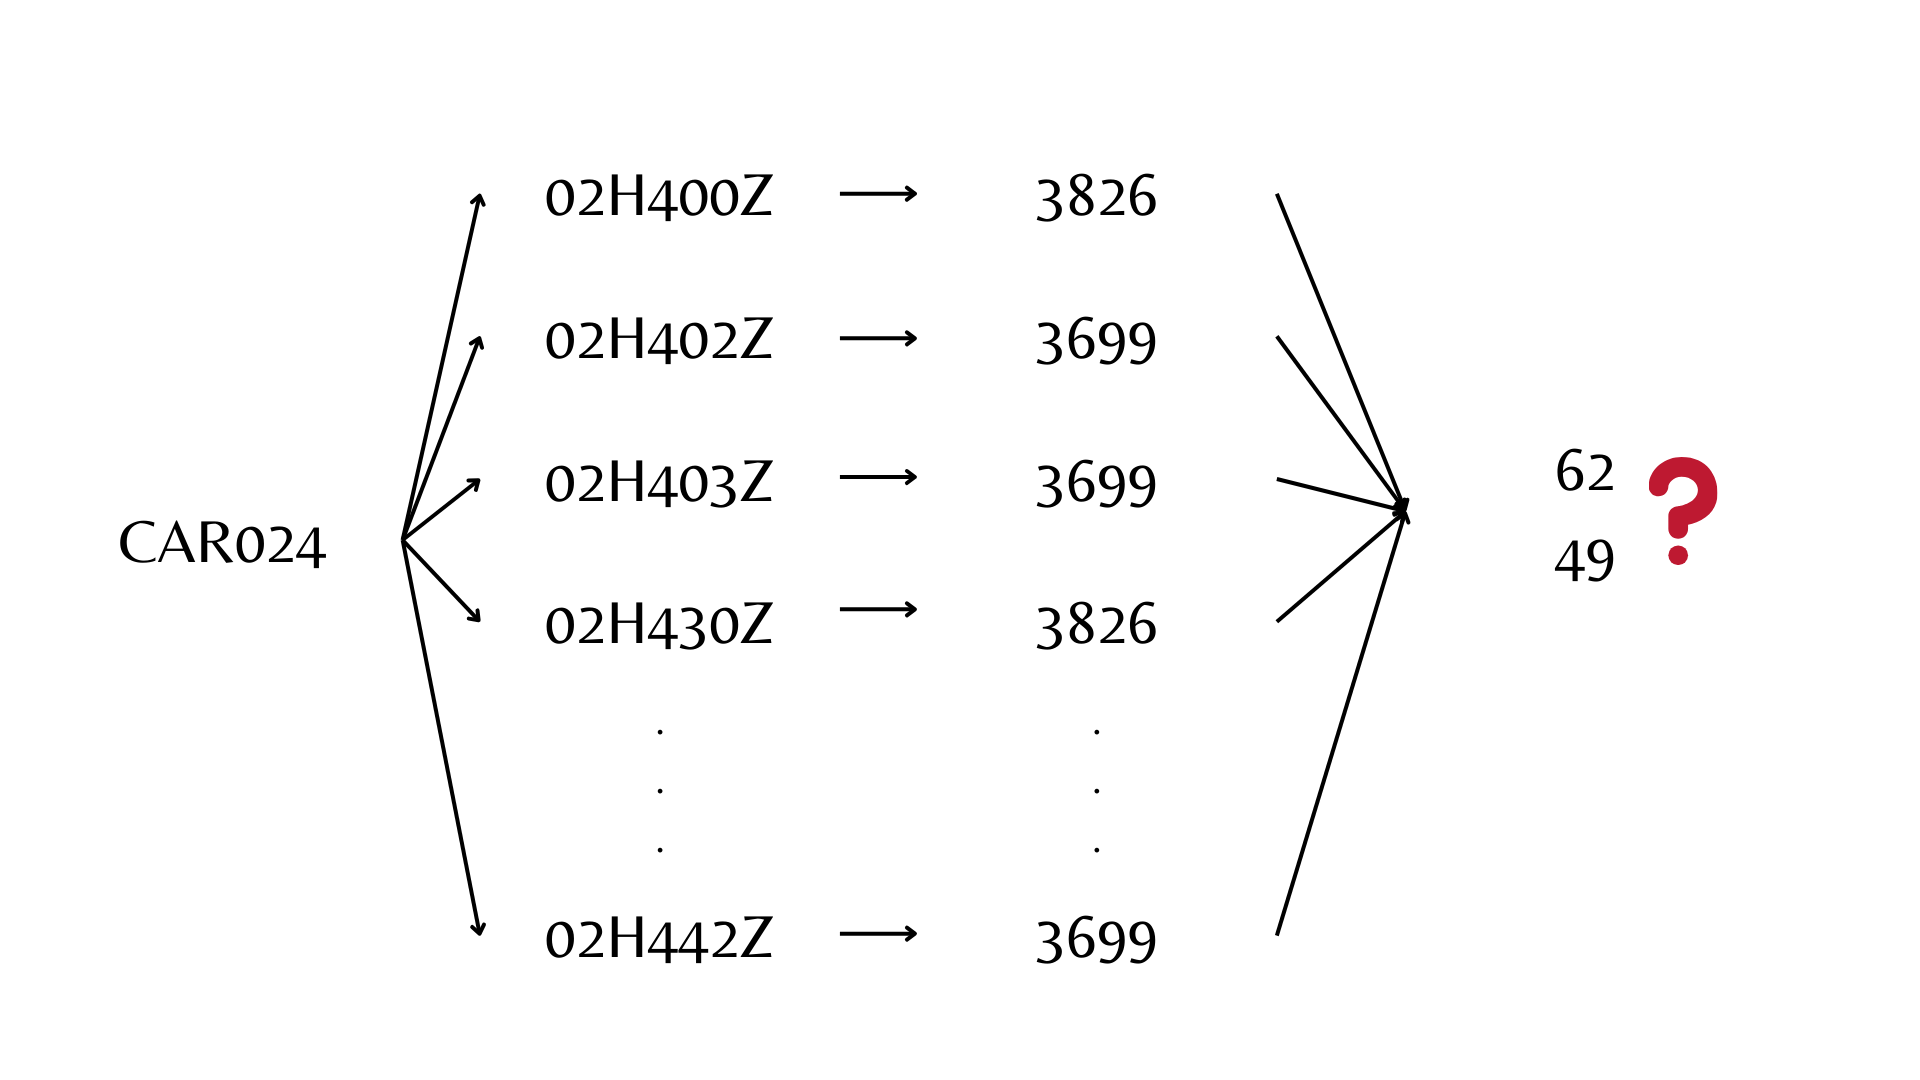

We used the 'CCSR Procedure Description' to calculate similarity ratios between the mapped and old descriptions in order to deal with this complexity. Taking into account the possibility that a single ICD-9-CM code could be connected to several outdated "CCSR Procedure Codes," this method sought to find the most comparable description. Through the 'calculate_similarity' function, we were able to obtain the highest similarity ratio, which allowed us to identify the matching 'CCSR Procedure Code'. An exact mapping of alphanumeric 'CCSR Procedure Codes' to their numeric equivalents is ensured by this meticulous process. Using the same process, numeric old 'CCSR Diagnosis Codes' were mapped to alphanumeric ones.


*Note:*
* ICD-10-PCS stands for "International Classification of Diseases, Tenth Revision, Procedure Coding System." It is a medical classification system used for procedural coding of medical services and procedures in healthcare.
* ICD-9-CM stands for "International Classification of Diseases, Ninth Revision, Clinical Modification." It is a medical coding system used for classifying diseases and medical conditions, primarily for billing and statistical purposes.

## Importing the CCSR converstion files

In [ ]:
# importing the required csv files for CCSR conversion files
ccsr_new_to_icd10pcs_procedure = pd.read_excel(r"/content/gdrive/Shareddrives/medical_data/CCSR_conversion_files/PRCCSR-Reference-File-v2023-1.xlsx", sheet_name='PR_to_CCSR_Mapping')
ccsr_new_to_icd10pcs_diagnosis = pd.read_excel(r"/content/gdrive/Shareddrives/medical_data/CCSR_conversion_files/DXCCSR-Reference-File-v2023-1.xlsx", sheet_name='DX_to_CCSR_Mapping', header=1)

icd10pcs_to_icd9cm_procedure = pd.read_excel(r"/content/gdrive/Shareddrives/medical_data/CCSR_conversion_files/icd10pcs_to_icd9cm_procedure.xlsx")
icd10cm_to_icd9cm_diagnosis = pd.read_excel(r"/content/gdrive/Shareddrives/medical_data/CCSR_conversion_files/icd10cm_to_icd9cm_disease.xlsx")

icd9cm_to_ccsr_old_procedure = pd.read_excel(r"/content/gdrive/Shareddrives/medical_data/CCSR_conversion_files/icd9cm_to_ccsr_old_procedure.xlsx")
icd9cm_to_ccsr_old_diagnosis = pd.read_excel(r"/content/gdrive/Shareddrives/medical_data/CCSR_conversion_files/icd9cm_to_ccsr_old_disease.xlsx", header=1)

## Cleaning the CCSR Code files

In [ ]:
# cleaning the ICD-9-CM to old CCSR file to remove the inverted commas from the data
icd9cm_to_ccsr_old_procedure["'ICD-9-CM CODE'"].replace('\s', '', regex=True, inplace=True)
icd9cm_to_ccsr_old_procedure["'CCS CATEGORY'"].replace('\s', '', regex=True, inplace=True)

# cleaning the ICD-9-CM to old CCSR file to remove the inverted commas from the data
icd9cm_to_ccsr_old_diagnosis["'ICD-9-CM CODE'"].replace('\s','', regex=True, inplace=True)
icd9cm_to_ccsr_old_diagnosis["'CCS CATEGORY'"].replace('\s','', regex=True, inplace=True)

In [ ]:
# removing the inverted commas from the procedure data
icd9cm_to_ccsr_old_procedure["'ICD-9-CM CODE'"] = icd9cm_to_ccsr_old_procedure["'ICD-9-CM CODE'"].str.extract('\'(?P<code>\S{1,})\'', expand=False)
icd9cm_to_ccsr_old_procedure["'CCS CATEGORY'"] = icd9cm_to_ccsr_old_procedure["'CCS CATEGORY'"].str.extract('\'(?P<code>\d{1,})\'', expand=False)

# removing the inverted commas from the disease data
icd9cm_to_ccsr_old_diagnosis["'ICD-9-CM CODE'"] = icd9cm_to_ccsr_old_diagnosis["'ICD-9-CM CODE'"].str.extract('\'(?P<code>\S{1,})\'', expand=False)
icd9cm_to_ccsr_old_diagnosis["'CCS CATEGORY'"] = icd9cm_to_ccsr_old_diagnosis["'CCS CATEGORY'"].str.extract('\'(?P<code>\d{1,})\'', expand=False)

In [ ]:
# converting the data type of the column into string to remove any idiosyncracies
icd10pcs_to_icd9cm_procedure['icd10cm'] = icd10pcs_to_icd9cm_procedure['icd10cm'].astype(str)
icd10cm_to_icd9cm_diagnosis['icd10cm'] = icd10cm_to_icd9cm_diagnosis['icd10cm'].astype(str)

In [ ]:
# changing the data type of the column icd9cm to string from integer
icd10pcs_to_icd9cm_procedure['icd9cm'] = icd10pcs_to_icd9cm_procedure['icd9cm'].astype(str)
icd10cm_to_icd9cm_diagnosis['icd9cm'] = icd10cm_to_icd9cm_diagnosis['icd9cm'].astype(str)

In [ ]:
# changing the column names by removing the string
icd9cm_to_ccsr_old_procedure.columns = icd9cm_to_ccsr_old_procedure.columns.str.replace("'","")
icd9cm_to_ccsr_old_diagnosis.columns = icd9cm_to_ccsr_old_diagnosis.columns.str.replace("'","")

In [ ]:
# removing the zeroes at the beginning from the codes - ICD-9-CM to CCSR Old Procedure file
# ICD-9-CM code in this file is '0017' but in the merging file it is '17'
icd9cm_to_ccsr_old_procedure['ICD-9-CM CODE'] = icd9cm_to_ccsr_old_procedure['ICD-9-CM CODE'].str.lstrip('0')

## Mapping the CCSR codes in a new dataframe

In [ ]:
# creating a new dataframe to store all the mapping of codes
ccsr_procedure_mapped = ccsr_new_to_icd10pcs_procedure[['CCSR Category', 'ICD-10-PCS Code']]
ccsr_diagnosis_mapped = ccsr_new_to_icd10pcs_diagnosis[['CCSR Category', 'ICD-10-CM Code']]

In [ ]:
# merging the data by mapping the data on ICD-10-PCM/CM code
ccsr_procedure_mapped = ccsr_procedure_mapped.merge(icd10pcs_to_icd9cm_procedure, how='left', left_on=ccsr_procedure_mapped['ICD-10-PCS Code'].astype(str), right_on=icd10pcs_to_icd9cm_procedure['icd10cm'].astype(str))
ccsr_diagnosis_mapped = ccsr_diagnosis_mapped.merge(icd10cm_to_icd9cm_diagnosis, how='inner', left_on='ICD-10-CM Code', right_on='icd10cm')

In [ ]:
# merging the data by mapping on the ICD-9-CM code
ccsr_procedure_mapped = ccsr_procedure_mapped.merge(icd9cm_to_ccsr_old_procedure, how='left', left_on='icd9cm', right_on='ICD-9-CM CODE')
ccsr_diagnosis_mapped = ccsr_diagnosis_mapped.merge(icd9cm_to_ccsr_old_diagnosis, how='inner', left_on='icd9cm', right_on='ICD-9-CM CODE')

In [ ]:
# transferring the new CCSR code, old CCSR code and the descriptions in new dataframe for convenience
ccsr_old_to_new_map_procedure = ccsr_procedure_mapped[['CCSR Category', 'CCS CATEGORY', 'ICD-9-CM CODE DESCRIPTION']]
ccsr_old_to_new_map_diagnosis = ccsr_diagnosis_mapped[['CCSR Category', 'CCS CATEGORY', 'ICD-9-CM CODE DESCRIPTION']]

# creating the copy of the mapping dataframes to avoid the warnings
ccsr_old_to_new_map_procedure = ccsr_old_to_new_map_procedure.copy()
ccsr_old_to_new_map_diagnosis = ccsr_old_to_new_map_diagnosis.copy()

# cleaning the column names
ccsr_old_to_new_map_procedure.rename(columns={'CCSR Category':'New CCSR Procedure Code', 'CCS CATEGORY': 'Old CCSR Procedure Code', 'ICD-9-CM CODE DESCRIPTION': 'Mapping Procedure Description'}, inplace=True)
ccsr_old_to_new_map_diagnosis.rename(columns={'CCSR Category':'New CCSR Diagnosis Code', 'CCS CATEGORY': 'Old CCSR Diagnosis Code', 'ICD-9-CM CODE DESCRIPTION': 'Mapping Diagnosis Description'}, inplace=True)

In [ ]:
# dropping the duplicates for both the mapping
ccsr_old_to_new_map_procedure.drop_duplicates(inplace=True)
ccsr_old_to_new_map_diagnosis.drop_duplicates(inplace=True)

## Mapping the codes in the original dataset

In [ ]:
year_with_new_ccsr = [2018, 2019, 2020, 2021]

# creating a new dataframe for data from the years 2018 to 2021
df_2018to2021 = df_2009to2021[df_2009to2021['Discharge Year'].isin(year_with_new_ccsr)]
df_2018to2021.head()

,Unnamed: 0,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,8091,Western NY,Niagara,3101000.0,565.0,Eastern Niagara Hospital - Lockport Division,50 to 69,140,M,White,Not Span/Hispanic,8,Emergency,Skilled Nursing Home,2018,RSP010,Aspiration Pneumonitis,NaN,NaN,137.0,major respiratory infections & inflammations,4.0,Diseases And Disorders Of The Respiratory System,3.0,Major,Major,Medical,Medicare,Medicaid,NaN,NaN,Y,43787.52,15301.93
1,548306,Hudson Valley,Ulster,5501001.0,990.0,HealthAlliance Hospital Broadway Campus,50 to 69,124,M,White,Spanish/Hispanic,14,Emergency,Home w/ Home Health Services,2018,CIR019,Heart Failure,CAR024,VENOUS AND ARTERIAL CATHETER PLACEMENT,194.0,heart failure,5.0,Diseases And Disorders Of The Circulatory System,3.0,Major,Major,Medical,Medicare,Federal/State/Local/VA,NaN,NaN,Y,149894.61,27010.59
2,335736,Western NY,Erie,1401013.0,218.0,Sisters of Charity Hospital,50 to 69,140,F,White,Not Span/Hispanic,4,Emergency,Home or Self Care,2018,GEN002,Acute And Unspecified Renal Failure,NaN,NaN,469.0,acute kidney injury,11.0,Diseases And Disorders Of The Kidney And Urina...,3.0,Major,Major,Medical,Medicare,Medicare,NaN,NaN,Y,15576.76,6799.55
3,1873330,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,104,M,Other Race,Spanish/Hispanic,1,Emergency,Home or Self Care,2018,MBD003,Bipolar And Related Disorders,MHT002,PSYCHOTHERAPY FOR MENTAL HEALTH (EXCLUDING SUB...,753.0,bipolar disorders,19.0,Mental Diseases And Disorders,2.0,Moderate,Minor,Medical,Medicare,Medicare,Medicaid,NaN,N,1400.00,1040.38
4,993822,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,70 or Older,144,F,White,Not Span/Hispanic,17,Emergency,Inpatient Rehabilitation Facility,2018,RSP012,Respiratory Failure; Insufficiency; Arrest,ESA004,NON-INVASIVE VENTILATION,133.0,respiratory failure,4.0,Diseases And Disorders Of The Respiratory System,3.0,Major,Major,Medical,Medicare,Private Health Insurance,NaN,NaN,Y,77656.16,36089.18


In [ ]:
# storing the original dataset for 2018 to 2021 for which we want to map the codes of procedure and diagnosis
orig_procedure_code_desc = df_2018to2021[['CCSR Procedure Code', 'CCSR Procedure Description']]
orig_diagnosis_code_desc = df_2018to2021[['CCSR Diagnosis Code', 'CCSR Diagnosis Description']]

In [ ]:
# merging the original data with the mapping to get the old CCSR codes for both procedure diagnosis
CCSR_procedure_mapping = orig_procedure_code_desc.merge(ccsr_old_to_new_map_procedure, how='inner', left_on='CCSR Procedure Code', right_on='New CCSR Procedure Code')
CCSR_diagnosis_mapping = orig_diagnosis_code_desc.merge(ccsr_old_to_new_map_diagnosis, how='inner', left_on='CCSR Diagnosis Code', right_on='New CCSR Diagnosis Code')

While mapping the new 'CCSR Procedure Description' and 'CCSR Diagnosis Description' to old description we observed that one procedure code can have multiple procedure descriptions and one diagnosis code can have multiple diagnosis description.   

To resolve and standardize the procedure and diagnosis description, we have used rapidfuzz library which calculates the similarity ratio between the group of description with each code and takes the highest similarity ratio description.

**Function calculate_similarity:** The function computes the similarity ratio between the descriptions of CCSR procedures and diagnoses. This ratio provides a measure of similarity between the original and mapped descriptions, and we keep the one with the highest similarity ratio.



In [ ]:
# function to calculate the similarity ratio between two descriptions using
def calculate_similarity(row,column1,column2):
    #return fuzz.ratio(row[column1], row[column2])
    return fuzz.token_sort_ratio(row[column1], row[column2])

In [ ]:
# calculating the similarity ratio for each row of data using the above function
CCSR_procedure_mapping['Similarity Ratio'] = CCSR_procedure_mapping.apply(calculate_similarity, axis=1, column1='CCSR Procedure Description', column2='Mapping Procedure Description')


In [ ]:
CCSR_diagnosis_mapping['Similarity Ratio'] = CCSR_diagnosis_mapping.apply(calculate_similarity, axis=1, column1='CCSR Diagnosis Description', column2='Mapping Diagnosis Description')

In [ ]:
# storing the unique new CCSR codes in an array
new_CCSR_codes = CCSR_procedure_mapping['CCSR Procedure Code'].unique()

# creating a new dataframe to store the one-on-one mapping of new CCSR codes to old CCSR codes
CCSR_procedure_final_mapping = pd.DataFrame()

# creating a function to get the old CCSR code for every new CCSR code by comparing the procedure description
# and keeping the one with highest similarity ratio
for ccsr_code in new_CCSR_codes:
    CCSR_procedure_final_mapping = pd.concat([CCSR_procedure_final_mapping, CCSR_procedure_mapping[CCSR_procedure_mapping['CCSR Procedure Code'] == ccsr_code].sort_values(by='Similarity Ratio', ascending=False).iloc[0, :].to_frame().T])

In [ ]:
# storing the unique new CCSR codes in an array
new_CCSR_diagnosis_codes = CCSR_diagnosis_mapping['CCSR Diagnosis Code'].unique()

# creating a new dataframe to store the one-on-one mapping of new CCSR codes to old CCSR codes
CCSR_diagnosis_final_mapping = pd.DataFrame()

# creating a function to get the old CCSR code for every new CCSR code by comparing the procedure description
# and keeping the one with highest similarity ratio
for ccsr_code in new_CCSR_diagnosis_codes:
    CCSR_diagnosis_final_mapping = pd.concat([CCSR_diagnosis_final_mapping, CCSR_diagnosis_mapping[CCSR_diagnosis_mapping['CCSR Diagnosis Code'] == ccsr_code].sort_values(by='Similarity Ratio', ascending=False).iloc[0,:].to_frame().T])

In [ ]:
updated_df = df_2018to2021.merge(CCSR_procedure_final_mapping, how='left', left_on='CCSR Procedure Code', right_on='CCSR Procedure Code')
updated_df = updated_df.merge(CCSR_diagnosis_final_mapping, how='left', left_on='CCSR Diagnosis Code', right_on='CCSR Diagnosis Code')

In [ ]:
# dropping the original columns that are not needed
updated_df.drop(['CCSR Diagnosis Code', 'CCSR Diagnosis Description_x', 'CCSR Procedure Code', 'CCSR Procedure Description_x',
                'New CCSR Procedure Code', 'CCSR Procedure Description_y', 'Similarity Ratio_x', 'CCSR Diagnosis Description_y',
                'New CCSR Diagnosis Code', 'Similarity Ratio_y'], axis=1, inplace=True)

In [ ]:
# renaming the column names for Diagnosis and Procedure Descriptions
updated_df.rename(columns={'Mapping Diagnosis Description': 'CCSR Diagnosis Description',
                           'Mapping Procedure Description': 'CCSR Procedure Description',
                           'Old CCSR Procedure Code': 'CCSR Procedure Code',
                           'Old CCSR Diagnosis Code': 'CCSR Diagnosis Code'}, inplace=True)

In [ ]:
# rearranging the column order
column_names = df_2009to2021.columns

# updating it in the updated_df
updated_df = updated_df[column_names]

In [ ]:
discharge_2009to2021 = df_2009to2021[df_2009to2021['Discharge Year'].isin(year_with_new_ccsr) == False]
discharge_2009to2021.head()

,Unnamed: 0,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,1095721,Long Island,Suffolk,5149000.0,895.0,John T Mather Memorial Hospital of Port Jeffer...,70 or Older,117,F,White,Not Span/Hispanic,22,Emergency,Home w/ Home Health Services,2009,135.0,Intestinal Infection,54.0,OT VASC CATH; NOT HEART,248.0,major gastrointestinal & peritoneal infections,6.0,Diseases And Disorders Of The Digestive System,3.0,Major,Moderate,Medical,Self-Pay,Self-Pay,NaN,0,Y,88254.96,23455.91
1,1420146,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center - North Division,50 to 69,104,M,Other Race,Spanish/Hispanic,3,Elective,Skilled Nursing Home,2009,203.0,Osteoarthritis,152.0,ARTHROPLASTY KNEE,302.0,knee joint replacement,8.0,Diseases And Disorders Of The Musculoskeletal ...,1.0,Minor,Minor,Surgical,Other Non-Federal Program,Self-Pay,NaN,0,N,58971.20,20662.83
2,545399,Long Island,Nassau,2908000.0,511.0,Winthrop-University Hospital,70 or Older,115,M,Black/African American,Not Span/Hispanic,10,Emergency,Skilled Nursing Home,2009,157.0,Acute Renal Failure,216.0,RESP INTUB/MECH VENTIL,460.0,renal failure,11.0,Diseases And Disorders Of The Kidney And Urina...,3.0,Major,Extreme,Medical,Insurance Company,Medicare,NaN,0,Y,104918.64,21311.57
3,1945839,New York City,Manhattan,7002053.0,1446.0,NYU Hospital for Joint Diseases,30 to 49,117,F,White,Not Span/Hispanic,8,Elective,Home w/ Home Health Services,2009,205.0,Back Problem,158.0,SPINAL FUSION,304.0,dorsal & lumbar fusion proc except for curvatu...,8.0,Diseases And Disorders Of The Musculoskeletal ...,1.0,Minor,Minor,Surgical,Blue Cross,Self-Pay,NaN,0,N,58051.09,20167.79
4,2402619,New York City,Queens,7003006.0,1632.0,Peninsula Hospital Center,18 to 29,116,F,Black/African American,Not Span/Hispanic,4,Emergency,Home or Self Care,2009,128.0,Asthma,0.0,NO PROC,141.0,asthma,4.0,Diseases And Disorders Of The Respiratory System,1.0,Minor,Minor,Medical,Self-Pay,NaN,NaN,0,Y,13619.20,4277.98


In [ ]:
# concatenating the data from the year 2018 to 2021 to the data of 2009 to 2017
discharge_2009to2021 = pd.concat([discharge_2009to2021, updated_df])

In [ ]:
# saving the updated dataframe into the old one for further use
df_2009to2021 = discharge_2009to2021
df_2009to2021

,Unnamed: 0,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,1095721,Long Island,Suffolk,5149000.0,895.0,John T Mather Memorial Hospital of Port Jeffer...,70 or Older,117,F,White,Not Span/Hispanic,22,Emergency,Home w/ Home Health Services,2009,135.0,Intestinal Infection,54.0,OT VASC CATH; NOT HEART,248.0,major gastrointestinal & peritoneal infections,6.0,Diseases And Disorders Of The Digestive System,3.0,Major,Moderate,Medical,Self-Pay,Self-Pay,NaN,0,Y,88254.96,23455.91
1,1420146,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center - North Division,50 to 69,104,M,Other Race,Spanish/Hispanic,3,Elective,Skilled Nursing Home,2009,203.0,Osteoarthritis,152.0,ARTHROPLASTY KNEE,302.0,knee joint replacement,8.0,Diseases And Disorders Of The Musculoskeletal ...,1.0,Minor,Minor,Surgical,Other Non-Federal Program,Self-Pay,NaN,0,N,58971.20,20662.83
2,545399,Long Island,Nassau,2908000.0,511.0,Winthrop-University Hospital,70 or Older,115,M,Black/African American,Not Span/Hispanic,10,Emergency,Skilled Nursing Home,2009,157.0,Acute Renal Failure,216.0,RESP INTUB/MECH VENTIL,460.0,renal failure,11.0,Diseases And Disorders Of The Kidney And Urina...,3.0,Major,Extreme,Medical,Insurance Company,Medicare,NaN,0,Y,104918.64,21311.57
3,1945839,New York City,Manhattan,7002053.0,1446.0,NYU Hospital for Joint Diseases,30 to 49,117,F,White,Not Span/Hispanic,8,Elective,Home w/ Home Health Services,2009,205.0,Back Problem,158.0,SPINAL FUSION,304.0,dorsal & lumbar fusion proc except for curvatu...,8.0,Diseases And Disorders Of The Musculoskeletal ...,1.0,Minor,Minor,Surgical,Blue Cross,Self-Pay,NaN,0,N,58051.09,20167.79
4,2402619,New York City,Queens,7003006.0,1632.0,Peninsula Hospital Center,18 to 29,116,F,Black/African American,Not Span/Hispanic,4,Emergency,Home or Self Care,2009,128.0,Asthma,0.0,NO PROC,141.0,asthma,4.0,Diseases And Disorders Of The Respiratory System,1.0,Minor,Minor,Medical,Self-Pay,NaN,NaN,0,Y,13619.20,4277.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988731,1998908,New York City,Manhattan,7002020.0,1453.0,Memorial Hospital for Cancer and Allied Diseases,50 to 69,113,F,White,Not Span/Hispanic,3,Emergency,Home or Self Care,2021,238,Anemia d/t antineo chemo (Begin 2009),NaN,NaN,861.0,"signs, symptoms and other factors influencing ...",23.0,Factors Influencing Health Status And Other Co...,3.0,Major,Moderate,Medical,Medicare,Blue Cross/Blue Shield,NaN,NaN,Y,64066.40,21717.82
1988732,360238,New York City,Bronx,7000014.0,1176.0,SBH Health System,0 to 17,104,M,Black/African American,Unknown,2,Newborn,Home or Self Care,2021,218,TWIN-NOS-IN HOSP W CS (Begin 1989),228,VACCINATION/INNOCULA NEC,640.0,"neonate birth weight > 2499 grams, normal newb...",15.0,Newborns And Other Neonates With Conditions Or...,1.0,Minor,Minor,Medical,Medicaid,NaN,NaN,2700.0,N,4887.09,3228.94
1988733,407629,New York City,Manhattan,7002020.0,1453.0,Memorial Hospital for Cancer and Allied Diseases,50 to 69,112,F,White,Not Span/Hispanic,2,Elective,Home w/ Home Health Services,2021,24,MAL NEO MALE BREAST NEC,175,BREAST IMPLANT REVISION,363.0,breast procedures except mastectomy,9.0,"Diseases And Disorders Of The Skin, Subcutaneo...",2.0,Moderate,Minor,Surgical,Blue Cross/Blue Shield,NaN,NaN,NaN,N,59623.88,25084.05
1988734,815262,New York City,Kings,7001021.0,1306.0,New York - Presbyterian Brookl

In [ ]:
# changing the description for diagnosis and procedure to Title Case
df_2009to2021['CCSR Diagnosis Description'] = df_2009to2021['CCSR Diagnosis Description'].str.title()
df_2009to2021['CCSR Procedure Description'] = df_2009to2021['CCSR Procedure Description'].str.title()

In [ ]:
# saving the cleaned file as a CSV for later use
path="/content/gdrive/Shareddrives/medical_data/"
df_2009to2021.to_csv(path+'discharge_2009to2021.csv', index=False)

In [ ]:
path="/content/gdrive/Shareddrives/medical_data/"
df_2009to2021 = pd.read_csv(path+'discharge_2009to2021.csv')

### **Exploratory Data Analysis**

#### Analyzing the race of patients discharged

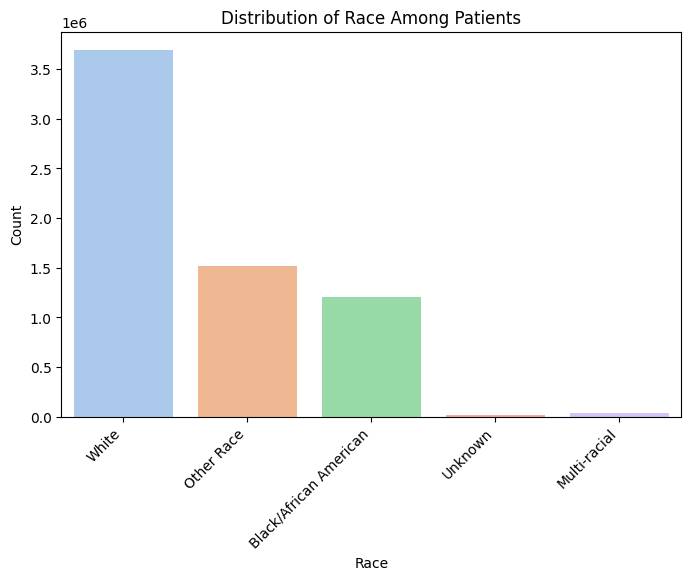

In [ ]:
# visualizing the race using a countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='Race', data=df_2009to2021, palette='pastel')

plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Race Among Patients')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

Most of the patients discharged from the hospitals are of White race. This can be because we are analyzing the details of patients discharged from hospitals situated in New York. The population diversity of New York consists mainly of native Americans followed by other races which also plays a role in the race distribution of patients discharged from the hospital in New York.

#### Analysing the count of patients in each age group
Analyzing the count of patients in each age group facilitates targeted healthcare planning, resource allocation, and policy development, ultimately contributing to more effective and tailored healthcare services for diverse age demographics.


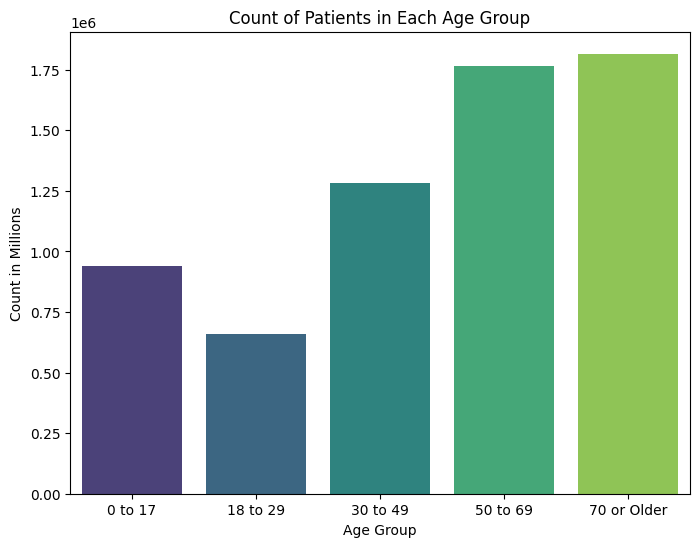

In [ ]:
# visualizing the count of patients in each age group

# defining the order of age groups
age_group_order = ['0 to 17', '18 to 29', '30 to 49', '50 to 69', '70 or Older']

# plotting the graph
plt.figure(figsize=(8, 6))
sns.countplot(x='Age Group', data=df_2009to2021, palette='viridis', order=age_group_order)
plt.title('Count of Patients in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count in Millions')
plt.show()

#### Observations:
1. The age groups above 50 have the highest patient counts
2. The lowest patient count is for the age group 18-29



#### Inferences:
1. The age groups above 50 are probably more prone to contracting illness hence having a high patient count. This could mean that the hospitals are getting a huge influx of geriatric patients which could possibly cause overload for the hospital system. To deal better with this the hospitals can have targeted health interventions to enforce efficient resource allocation. The spike in patient count for this age group might indicate a need for health programs addressing conditions prevalent in senior individuals.
2. The pediatric department also faces a similar huge influx of patients and efficient planning could




# Data Analysis

## 1. Analyzing the effect of population demographics on disease contraction

## Introduction:
This analysis aims to investigate if there a effect of population demographics like race, age group and gender on the type of diseases they are likely to contract over the years.

## Objectives:
1. Identify if a certain age group is more prone to contracting a disease.
2. Identify if any of the demographic factors effect the diseases in the patient population.



#### **Exploratory Data Analysis**
We'll analysis distibution of demography variables - Age Group, Gender, Race and Ethnicity. *'pct_count'* is a custom function that takes dataset and grouby column as input to give count and % distribution

In [ ]:
# Calculating the count and percentage of each category or group in the provided data
def pct_count(data, group_by=None):
    if group_by:
        # For groupby operations (When group_by is provided)
        grouped = data.groupby(group_by).size().reset_index(name='Count')
    else:
        # For value counts (No group_by)
        grouped = data.value_counts().reset_index()
        grouped.columns = ['Category', 'Count']

    total_count = grouped['Count'].sum()
    grouped['Percentage'] = round((grouped['Count'] / total_count) * 100, 2)

    return grouped.sort_values(by='Count', ascending=False)

In [ ]:
# Displaying the count and percentage of patients in each age group
pct_count(df_2009to2021['Age Group'])

,Category,Count,Percentage
0,70 or Older,1816258,28.10
1,50 to 69,1764758,27.30
2,30 to 49,1283581,19.86
3,0 to 17,938825,14.53
4,18 to 29,659970,10.21


In [ ]:
# Displaying the count and percentage of each gender among the patients
pct_count(df_2009to2021['Gender'])

,Category,Count,Percentage
0,F,3589769,55.54
1,M,2873366,44.46
2,U,257,0.00


In [ ]:
# Displaying the count and percentage of each race among the patients
pct_count(df_2009to2021, group_by = ['Race'])

,Race,Count,Percentage
4,White,3693183,57.14
2,Other Race,1513166,23.41
0,Black/African American,1202803,18.61
1,Multi-racial,38516,0.60
3,Unknown,15724,0.24


In [ ]:
# Displaying the count and percentage of each ethnicity among the patients
pct_count(df_2009to2021, group_by = ['Ethnicity'])

,Ethnicity,Count,Percentage
1,Not Span/Hispanic,5216286,80.71
2,Spanish/Hispanic,867474,13.42
3,Unknown,365840,5.66
0,Multi-ethnic,13792,0.21


In [ ]:
# Grouping race and ethnicity and displaying the top 10 in terms of count of patients
pct_count(df_2009to2021, group_by = ['Race', 'Ethnicity']).head(10)

,Race,Ethnicity,Count,Percentage
16,White,Not Span/Hispanic,3348755,51.81
1,Black/African American,Not Span/Hispanic,1098887,17.00
9,Other Race,Not Span/Hispanic,744218,11.51
10,Other Race,Spanish/Hispanic,563817,8.72
17,White,Spanish/Hispanic,236021,3.65
11,Other Race,Unknown,200662,3.10
18,White,Unknown,105602,1.63
2,Black/African American,Spanish/Hispanic,58038,0.90
3,Black/African American,Unknown,44402,0.69
5,Multi-racial,Not Span/Hispanic,22463,0.35


### **Observations**
1. We have good distribution of Age groups and Gender of inpatients for our analysis
2. Most of the inpatients are White (55%)/Non Hispanic (75%).
Not enough data to analyze disease contraction based on race and ethnicity. Hence demographic analysis at overall level done for Age, Gender vs Disease, Treatment
3. Further we'll normalize the race data, to compare disease contractions across different race

In [ ]:
# Displaying data from 2009 to 2021 grouped by race, age group and gender
pct_count(df_2009to2021, group_by = ['Race', 'Age Group','Gender']).head(10)

,Race,Age Group,Gender,Count,Percentage
63,White,70 or Older,F,723104,11.19
64,White,70 or Older,M,564844,8.74
61,White,50 to 69,M,547612,8.47
60,White,50 to 69,F,471912,7.30
57,White,30 to 49,F,405456,6.27
58,White,30 to 49,M,230568,3.57
52,White,0 to 17,M,225938,3.50
54,White,18 to 29,F,225525,3.49
32,Other Race,30 to 49,F,217186,3.36
51,White,0 to 17,F,211986,3.28


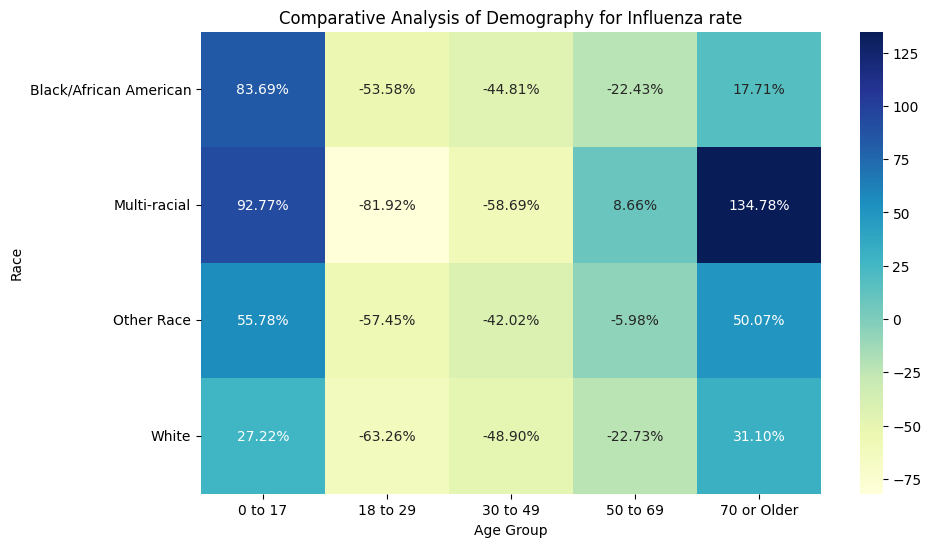

In [ ]:
df_filtered = df_2009to2021[df_2009to2021['Race'] != 'Unknown']
# Function to filter dataset for selected disease
def plot_percentage_contingency_table(selected_disease):
    # Filter the DataFrame for the selected disease (numerator)
    df_filtered_numerator = df_filtered[df_filtered['CCSR Diagnosis Description'] == selected_disease]

    # Filter the DataFrame for all diseases (denominator)
    df_filtered_denominator = df_filtered

    # Create contingency tables for selected disease (numerator) and All disease (denominator)
    contingency_table_numerator = pd.crosstab(df_filtered_numerator['Race'], df_filtered_numerator['Age Group'])
    contingency_table_denominator = pd.crosstab(df_filtered_denominator['Race'], df_filtered_denominator['Age Group'])


    # Calculate the ratio of numerator to denominator (for disease rate)
    contingency_table_ratio = contingency_table_numerator / contingency_table_denominator
    average_percentage = contingency_table_ratio.mean().mean()

    # Calculating how high/low the rate is for the demography cross section compared to the average rate of the demography
    percentage_contingency_table =100*(contingency_table_ratio - average_percentage)/average_percentage

    # Display the percentage-based contingency table as a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(percentage_contingency_table, annot=np.vectorize(lambda x: f'{x:.2f}%')(percentage_contingency_table.values), fmt='', cmap='YlGnBu')
    plt.title(f'Comparative Analysis of Demography for {selected_disease} rate')
    plt.xlabel('Age Group')
    plt.ylabel('Race')
    plt.show()

plot_percentage_contingency_table('Influenza')

Observations:
Patients in the age group of 0-17  are more affected by influenza compared to other age groups because they have weaker immune systems and are too young to receive the flu vaccine. The same increase can be observed in the age group 70 years and older because as age increases, immunity decreases.

Conclusion:
The lower proportions in the middle age groups could indicate either a lower incidence of infleunza or better immunity, possibly due to vaccinations or prior exposure.

## 2. Population's vulnerability to certain diseases over the years 2009 to 2021

## Introduction:
This analysis aims to investigate the changing vulnerability of the population to specific diseases over the span of a decade. Understanding how vulnerability has evolved can offer insights into disease prevalence, potential shifts in susceptibility, and the effectiveness of healthcare interventions.By examining this evolution, we can gain valuable insights into various aspects, including changes in disease prevalence, shifts in population susceptibility, and the potential impact of healthcare interventions.

#### Objectives:
**Data Filtering:** Filter the main dataframe to include only the rows related to septicemia cases.

**Grouping and Counting:** Group the filtered data by 'Discharge Year' and 'APR Risk of Mortality' and count the occurenecs for each.

**Time Series Plotting:** Plot a time series graph for different risk levels over each year, to get how the risk of mortality has changed for septicemia cases from 2009 to 2021.



In [ ]:
#count the most occuring procedure/condition/disease
diagnosis_counts = df_2009to2021['CCSR Diagnosis Description'].value_counts()
diagnosis_counts.head(25)

Liveborn                                                                          422871
Twin-Nos-In Hosp W Cs (Begin 1989)                                                185914
Septicemia (Except In Labor)                                                      124143
Postop Shock Septic (Begin 2011)                                                  123509
Mood Disorders                                                                    107591
Osteoarthritis                                                                    105711
Congestive Heart Failure; Nonhypertensive                                          60781
Asthma                                                                             59593
Pneumonia (Except That Caused By Tuberculosis Or Sexually Transmitted Disease)     58716
Alcohol-Related Disorders                                                          57348
Cardiac Dysrhythmias                                                               55544
Heart Failure Nos    

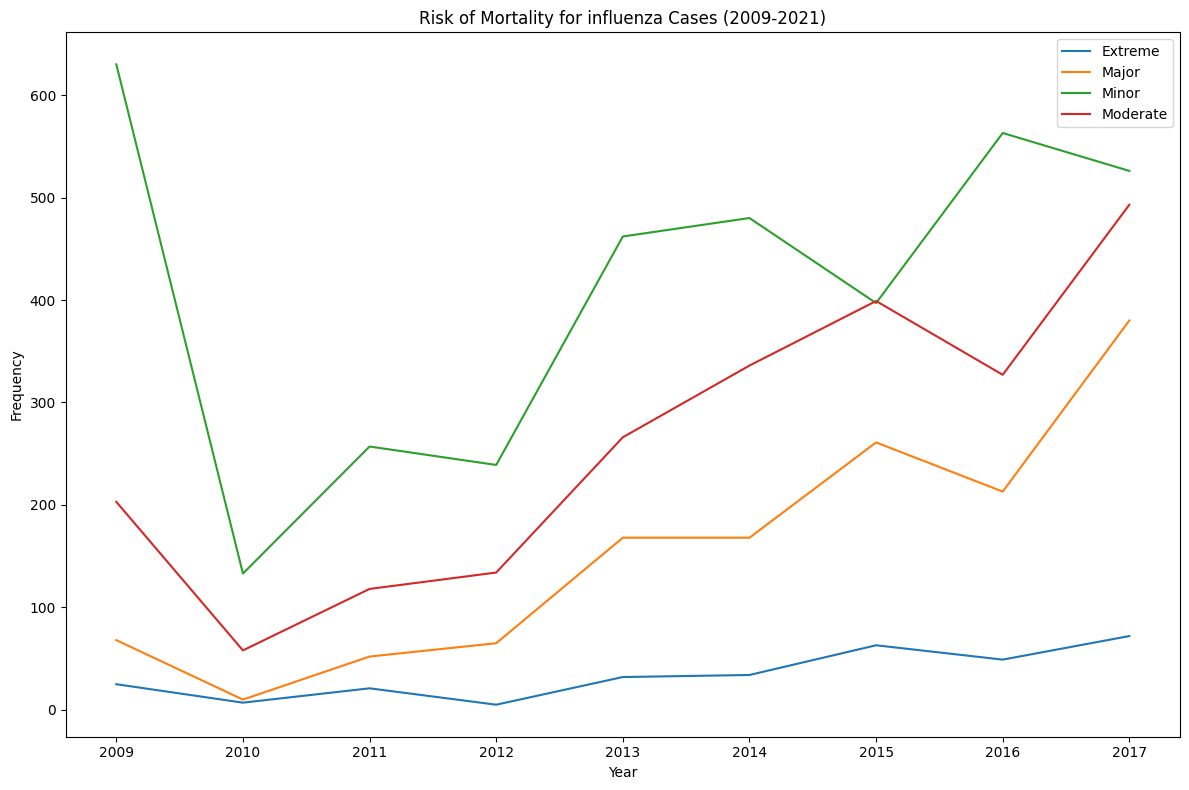

In [ ]:
# Filter the DataFrame for rows where diagnosis is 'influenza’
influenza_df = df_2009to2021[df_2009to2021['CCSR Diagnosis Description'] == 'Influenza']

# Group by 'Discharge Year' and 'APR Risk of Mortality' and count occurrences
risk_counts_by_year = influenza_df.groupby(['Discharge Year', 'APR Risk of Mortality']).size().unstack(fill_value=0)

# Plotting the time series for different risk levels for each year
plt.figure(figsize=(12, 8))
for risk in risk_counts_by_year.columns:
    plt.plot(risk_counts_by_year.index, risk_counts_by_year[risk], label=risk)

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Risk of Mortality for influenza Cases (2009-2021)')
plt.legend()
plt.tight_layout()
plt.show()

From the above graph, we could see the following pattern:

**Decreased Cases in 2009 maybe due to Increased Vaccine Awareness:**
In 2009, immunization campaigns and more public awareness may have had a significant impact on a possible decline in illness cases. 2009 was defined by the widespread H1N1 influenza virus outbreak, commonly referred to as the "swine flu." To slow down the virus's spread, governments and health organizations all over the world started massive vaccination campaigns. A major contributing factor to the decline in cases was probably increased vaccination rates and awareness.

**Reduced Vaccine Effectiveness or Dominant Strain H3N2:**
Vulnerability to some diseases may change over time due to changes in vaccination effectiveness. The effectiveness of vaccines may be hampered by the introduction of novel strains, as the influenza A virus's H3N2 subtype.The influenza virus undergoes genetic changes, and the effectiveness of the annual flu vaccine depends on the match between the circulating strains and those included in the vaccine.

**Misdiagnosis due to Covid-19 after 2020:**
The COVID-19 pandemic had a major effect on healthcare systems worldwide after 2020. It is possible for COVID-19 symptoms to be misdiagnosed because they can resemble those of other respiratory conditions. It was difficult for medical experts to differentiate COVID-19 from other respiratory diseases, especially in the early phases of the pandemic when testing resources were limited.


In [ ]:
# creating a sample to run the Linear Regression
df_2009to2021_sample = pd.DataFrame()
for year in range(2009,2022):
  temp_df = df_2009to2021[df_2009to2021["Discharge Year"] == year].sample(n=50000)
  df_2009to2021_sample = pd.concat([df_2009to2021_sample, temp_df])

In [ ]:
from lightgbm import LGBMRegressor

#df_2009to2021 = pd.read_csv('df_2009to2021.csv', low_memory=False)
sampled_data = df_2009to2021_sample
# Extract relevant columns for regression analysis
regression_columns = ['Discharge Year', 'CCSR Diagnosis Code', 'Age Group', 'Gender', 'Race', 'APR Severity of Illness Code','Length of Stay','APR Risk of Mortality']
regression_data = sampled_data[regression_columns]

# Perform one-hot encoding on categorical columns to prepare data for regression
regression_data = pd.get_dummies(regression_data, columns=['Age Group', 'Gender', 'Race', 'CCSR Diagnosis Code','Length of Stay','APR Risk of Mortality'])


# Separate input features and target variable
input_features = regression_data.drop('APR Severity of Illness Code', axis=1)
target_variable = regression_data['APR Severity of Illness Code']

#target_variable.fillna('unknown', inplace=True)

# Split data into training and testing sets (80% train, 20% test)
input_features_train, input_features_test, target_variable_train, target_variable_test = train_test_split(
    input_features, target_variable, test_size=0.2)

# Initialize and train a linear regression model
regression_model = LGBMRegressor(random_state=42)
regression_model.fit(input_features_train, target_variable_train)

# Make predictions on the testing set
target_variable_pred = regression_model.predict(input_features_test)

# Evaluate the model using Mean Squared Error and R-squared metrics
print('Mean Squared Error:', mean_squared_error(target_variable_test, target_variable_pred))
print('R-squared:', r2_score(target_variable_test, target_variable_pred))



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 754
[LightGBM] [Info] Number of data points in the train set: 520000, number of used features: 371
[LightGBM] [Info] Start training from score 2.021090
Mean Squared Error: 0.2908176902704917
R-squared: 0.6522475975650173


In [ ]:
age_group = '0 to 17'
selected_gender = 'M'
selected_ccsr_code = 123.0
# Filter the dataset for the age group and gender
input_features_desired = regression_data[
    (regression_data[f'Age Group_{age_group}'] == 1) &
    (regression_data[f'Gender_{selected_gender}'] == 1) &
    (regression_data[f'CCSR Diagnosis Code_{selected_ccsr_code}'] == 1)
]

input_features_desired = input_features_desired.drop(['APR Severity of Illness Code'], axis=1)

# Use the trained models to predict mortality rates
predicted_mortality = regression_model.predict(input_features_desired)
average_predicted_mortality = round(predicted_mortality.mean())

print(f'Predicted Mortality rates for {age_group} and gender {selected_gender} for {selected_ccsr_code} is:\n\n {average_predicted_mortality}\n\n')

Predicted Mortality rates for 0 to 17 and gender M for 123.0 is:

 2




The above output shows that individuals in the age group of **0 to 17** have a **moderate** vulnerability to **Influenza** disease. This suggests that they are neither at the lowest nor highest risk. This also suggests that possible vaccinations and targeted health education can be considered. It is crucial to adapt to ongoing research work in this area and launch campaigns promoting health education related to influenza disease.

The above model helps to forecast the vulnerability of specific diseases for specific age groups to make informed decisions and decide on a responsive approach to address health concerns related to these diseases for different age groups.



# 3. Time series analysis of procedures for treating diseases
To perform a timeseries analysis of the procedural changes over the years we first need to make a data frame that would let us know how many procedures were used to treat a certain diseases in a certain year. Using this dataframe we can find out the variation in treatments of certain diseases. We will use ony the Diagnosis and procedure for the frequency counts.


In [ ]:
# Defining a function to group the dataframe based on the index provided and unstack on the basis of the value of level
# To create a time series dataframe for all the diseases and their respective procedure over a time span.
def value_count_analysis(df,index,level):
    temp=df.groupby(by=index).value_counts()
    return temp.unstack(level=level)
# Creating a new data frame with columns Discharge Year,CCSR Diagnosis Description and CCSR Procedure Description
new_df=df_2009to2021[['Discharge Year','CCSR Diagnosis Description','CCSR Procedure Description']]
# Creating a new data frame which has the time series data of all the diagnosis and procedures performed between 2009 and 2021
analysis=value_count_analysis(new_df,['Discharge Year','CCSR Diagnosis Description'],0)

In our healthcare analysis, where there are numerous diseases and corresponding medical procedures, we aim to develop a method for assessing the changing trends in procedures over time. To achieve this, we assign a standardized value between 0 and 1 (inclusive) for each procedure associated with a specific disease. This value serves as a representation of the importance of the procedure in relation to others for that disease.

For every year and disease combination, we then normalize the number of patients who have undergone procedures, ensuring that the total for each year sums up to 1. This normalization allows us to understand the proportion of each procedure's occurrence in a given year for a specific disease.

Next, we multiply the assigned procedure value by the normalized patient count for each year and sum these values. The resulting sum provides a unique metric for each disease, indicating the overall significance of procedures for that disease in a particular year. By calculating the standard deviation of these metrics over the years, we gain insights into the variability or consistency in the treatment patterns for each disease. This information can be valuable for assessing trends and making informed decisions regarding healthcare strategies.


In [ ]:
# Function to rank variability of the procedures of each disease across the years
def get_variations(df, diagnosis, procedure,thresh=10000) :
  # Grouping on the basis of diagnosis and deleting diseases which don't have atleast two types of procedure
  multi_procedure=df.groupby(level=0).filter(lambda x: len(x)>1)
  # Filling all null values with zero
  multi_procedure.fillna(0)
  # Checking whether a disease has been treated more than once across all the year
  series=multi_procedure.groupby(level=0).sum().replace(0.0,nan).isna().sum(axis=1)
  # To drop all the procedures which have NaN values for the columns two less than the total number of columns
  multi_procedure.drop(series[series>len(multi_procedure.columns-2)].index)
  #getting the diagnosis with high number of treatments over the years to better find trend changes
  high_count_diagnosis=multi_procedure.groupby(level=0).sum().sum(axis=1)>thresh
  high_count_diagnosis=multi_procedure.loc[high_count_diagnosis[high_count_diagnosis].index]
  # Normalizing the data across all the procedures over the years according to the column sum of each disease procedure
  norm_multi_procedure = high_count_diagnosis.groupby(level=0, group_keys=False).apply(lambda x: x / x.sum())
  # Getting the count of the procedures for each disease and sorting it from high to low
  index_list=norm_multi_procedure.sort_index().reset_index()[diagnosis].value_counts().sort_index()
  col=[]
  # Creating a equally weighted distribution for all the rows in the dataframe between values of 0 and 1
  for x in index_list:
    temp_col=[]
    for y in range(0,x):
      temp_col.append(y/x)
    col.extend(temp_col)

  new_col=pd.Series(col)
  # Reseting all the index of the normalized dataframe and sorting the data
  reset_multi_procedure=norm_multi_procedure.sort_index().reset_index()
  # Adding a new column Value which assigns equal spaced weight to each procedure between the value of 0 and 1
  reset_multi_procedure['Value']=new_col
  # Setting the provided columns to the function as a multi-valued index
  valued_df=reset_multi_procedure.set_index([diagnosis,procedure])
  # Determining the standard deviation between every procedure of each disease and sorting the diseases according to the value of their deviation
  variation_list = valued_df.apply(lambda x: x*valued_df['Value']).drop(columns='Value').groupby(level=0).sum().replace(0.0,nan).std(axis=1).sort_values(ascending=False)
  return variation_list.dropna()

In [ ]:
disease_data_deviation = get_variations(analysis, 'CCSR Diagnosis Description', 'CCSR Procedure Description')
disease_data_deviation

CCSR Diagnosis Description
Ob-Related Trauma To Perineum And Vulva        0.078672
Acute Bronchitis                               0.074632
Fetal Distress And Abnormal Forces Of Labor    0.051802
Diverticulosis And Diverticulitis              0.043806
Other Complications Of Pregnancy               0.043293
                                                 ...   
Acute Renal Failure                            0.001486
Post Term Preg-Delivered (Begin 2000)          0.001466
Gen Osteoarthros-Hand                          0.001372
Ob Perineal/Vulv Trauma                        0.001076
Urinary Tract Infection                        0.000927
Length: 144, dtype: float64

With this list we are able to look at certain diseases which are more likely to have a variation in their procedures over the years. We can even automate the same by using a function where one can just enter a diagnosis and get a visualization of the procedures.

In [ ]:
def stacked_bar_chart(diagnosis,top=False):
    #setting the mask and title based on whether the input is a list like or not
    mask= pd.Series(False,index=analysis.index)
    title=""
    #checking if it is a list like
    if isinstance(diagnosis, list):
        #going through the list and add to the mask and title
        title=f'Procedure Trends of {", ".join(diagnosis)} over time'
        for diagStr in diagnosis:
            mask=np.logical_or(mask , analysis.apply(lambda x: x.name[0].lower().find(diagStr.lower())!=-1,axis=1))
    else:
        #making the mask and title based on a single input
        title=f'Procedure Trends of {diagnosis} over time'
        mask=np.logical_or(mask , analysis.apply(lambda x: x.name[0].lower().find(diagnosis.lower())!=-1,axis=1))
    top_4=analysis[mask]
    #getting all the procedures and combinig them
    top_4.index = top_4.index.get_level_values(1)
    top_4=top_4.groupby(as_index=True,level=0).sum()
    #getting total number of procedures done for each year to save
    sum_of_proc=top_4.sum()
    top_proc=set()
    #analysis.loc[diagnosis].loc[analysis.loc[diagnosis].sum(axis=1).sort_values().iloc[(-1*top):].index] if top!=False else analysis.loc[diagnosis]
    # separating based on if we want top procedure data or all the data
    if top!=False:
        for year in top_4.columns:
            top_proc.update(list(top_4[year].sort_values(ascending=False).iloc[:(top)].index))
    else:
        for year in top_4.columns:
            top_proc.update(list(top_4[year].sort_values(ascending=False).iloc[:].index))
    top_4=top_4.loc[list(top_proc)]
    #finding normalised procedure values based on total procedure
    proportion=top_4.apply(lambda x: x*100/(sum_of_proc[x.name]))
    #plotting a stacked bar chart
    ax=proportion.T.reset_index().plot.bar(x='Discharge Year',stacked=True,colormap='Pastel1')
    #Customising title, legend and labels for easier viewing
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
          fancybox=True, shadow=True)
    plt.ylabel('Percentage')
    plt.title(title)
    plt.show()

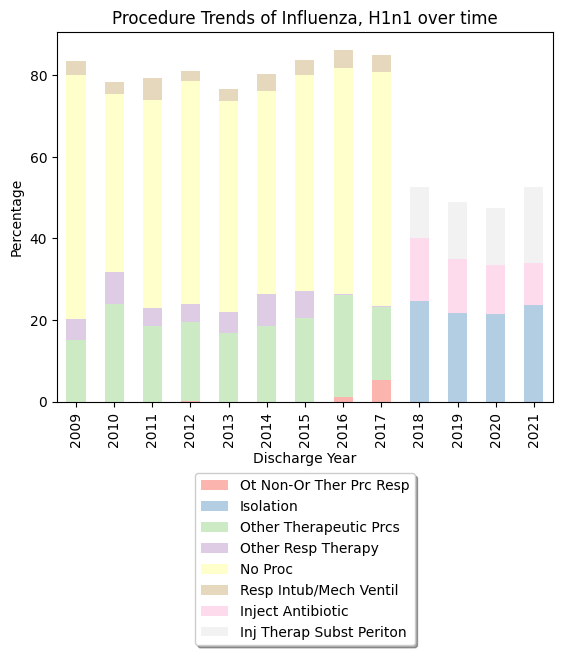

In [ ]:
#Calling the bar chart function
stacked_bar_chart(['Influenza','H1n1'],3)

The chart shows a consistency in the treatment of Influenza annd its strains, which shows that the while the Influenza elvovles and adapts our medicine and treatments are not. This is due to the difficulty in combating viruses and the priority in treating the symtomps.
With further exploration we can find a diseases that can find a variation in procedures


# 4. Predictive Model to Forecast Total Charges and Total Costs for Hospital Discharges
The core objective is to forecast and understand the financial implications associated with medical care. This prediction serves several purposes within the healthcare industry. Firstly, it aids in resource planning and allocation within healthcare systems. By estimating costs related to treatments, procedures, or patient conditions, hospitals and healthcare providers can effectively allocate budgets and resources, optimizing services based on anticipated expenses.

Moreover, this predictive analysis assists in assessing the financial risks involved in treating patients with specific medical conditions or undergoing particular procedures. It provides valuable insights for pricing strategies, managing financial risks, and determining suitable reimbursement rates for insurers and healthcare providers.

Additionally, the models' performance evaluation through metrics like Mean Squared Error (MSE) and R-squared is crucial. These assessments provide insights into how accurately the models predict healthcare costs. Such insights facilitate model refinement, selection of appropriate algorithms, and optimization of predictions, leading to more informed and effective decision-making in healthcare finance and resource management.

In summary, the primary goal of employing this code is to utilize machine learning to predict healthcare costs, enabling better financial planning, resource management, risk assessment, and informed decision-making within the healthcare industry.


In [ ]:
# Extract relevant columns for regression analysis
regression_columns = ['Discharge Year', 'CCSR Diagnosis Code', 'CCSR Procedure Code', 'APR Severity of Illness Code', 'Total Charges', 'Total Costs', 'Hospital County', 'Hospital Service Area','Emergency Department Indicator','APR Risk of Mortality', 'Permanent Facility Id','Type of Admission','APR MDC Code','APR DRG Code','Gender','Length of Stay']
regression_data = df_2009to2021_sample[regression_columns]

# One-hot encode categorical columns
categorical_cols = ['CCSR Diagnosis Code', 'CCSR Procedure Code', 'APR Severity of Illness Code', 'Hospital County', 'Hospital Service Area','Emergency Department Indicator','APR Risk of Mortality', 'Permanent Facility Id','Type of Admission','APR MDC Code','APR DRG Code', 'Gender','Length of Stay']
regression_data_encoded = pd.get_dummies(regression_data, columns=categorical_cols)

# Separate input features and target variables (Total Charges and Total Costs)
input_features = regression_data_encoded.drop(['Total Charges', 'Total Costs'], axis=1)
target_charge = regression_data_encoded['Total Charges']
target_cost = regression_data_encoded['Total Costs']

# Split data into training and testing sets (80% train, 20% test)
input_features_train, input_features_test, target_charge_train, target_charge_test, target_cost_train, target_cost_test = train_test_split(
    input_features, target_charge, target_cost, test_size=0.2, random_state=42
)

# Initialize and train LGBMRegressor models for Total Charges and Total Costs
charge_lgbm_model = LGBMRegressor(random_state=42)
charge_lgbm_model.fit(input_features_train, target_charge_train)

cost_lgbm_model = LGBMRegressor(random_state=42)
cost_lgbm_model.fit(input_features_train, target_cost_train)

# Make predictions on the testing set for Total Charges
charge_predictions = charge_lgbm_model.predict(input_features_test)

# Evaluate the model for Total Charges
print('Total Charges - Mean Squared Error:', mean_squared_error(target_charge_test, charge_predictions))
print('Total Charges - R-squared:', r2_score(target_charge_test, charge_predictions))

# Make predictions on the testing set for Total Costs
cost_predictions = cost_lgbm_model.predict(input_features_test)

# Evaluate the model for Total Costs
print('Total Costs - Mean Squared Error:', mean_squared_error(target_cost_test, cost_predictions))
print('Total Costs - R-squared:', r2_score(target_cost_test, cost_predictions))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 520000, number of used features: 1252
[LightGBM] [Info] Start training from score 45314.484568
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 520000, number of used features: 1252
[LightGBM] [Info] Start training from score 15078.147208
Total Charges 


In the above code, we are doing the following:
- Data Preparation: Extracts and preprocesses relevant columns from a sampled dataset, specifically focusing on features like 'Discharge Year', 'CCSR Diagnosis Code', 'CCSR Procedure Code', 'APR Severity of Illness Code' etc. It encodes categorical variables into a numerical format suitable for regression analysis.

- Model Building: Utilizes LightBGM to create two distinct models:

 - charge_regression_model: Predicts 'Total Charges' based on various input features.
 - cost_regression_model: Predicts 'Total Costs' using the same input features.

- Training and Evaluation: Splits the dataset into training and testing subsets, trains the regression models on the training data, and generates predictions for 'Total Charges' and 'Total Costs' on the testing set.

- Model Assessment: The objective is to assess the performance and predictive accuracy of the regression models. The evaluation metric calculation lines would allow for the assessment of how well the models predict healthcare costs based on the chosen features.

Overall, we create predictive models using LightGBM for estimating healthcare costs based on a set of relevant features, along with the evaluation and interpretation of model performance metrics.

In [ ]:
# Desired CCS Procedure Code
desired_ccs_procedure_code = 231.0

# Create a dictionary to store predicted charges and costs for each year
predicted_results = {}

# Loop through the years from 2024 to 2034
for year in range(2010, 2020):
    # Create input features for the specified year
    input_features_future = regression_data_encoded.copy()
    input_features_future['Discharge Year'] = year

    # Filter the dataset for the desired CCSR Procedure Code for the specified year
    input_features_future_desired = input_features_future[
        input_features_future[f'CCSR Procedure Code_{desired_ccs_procedure_code}'] == 1
    ]
    input_features_future_desired = input_features_future_desired.drop(['Total Charges', 'Total Costs'], axis=1)

    # Use the trained models to predict costs for the desired CCSR Procedure Code for the specified year
    predicted_charge_future = charge_lgbm_model.predict(input_features_future_desired)
    predicted_cost_future = cost_lgbm_model.predict(input_features_future_desired)

    # Calculate average predicted charges and costs for the specified year
    average_predicted_charge = predicted_charge_future.mean()
    average_predicted_cost = predicted_cost_future.mean()

    # Store the results in the dictionary
    predicted_results[year] = {
        'Predicted Charges': average_predicted_charge,
        'Predicted Costs': average_predicted_cost
    }

# Print the predicted charges and costs for each year
for year, results in predicted_results.items():
    predicted_charges = round(results["Predicted Charges"], 2)
    predicted_costs = round(results["Predicted Costs"], 2)
    print(f'Year: {year}')
    print(f'Average Predicted Charges: {predicted_charges}')
    print(f'Average Predicted Costs: {predicted_costs}\n')

Year: 2010
Average Predicted Charges: 33986.58
Average Predicted Costs: 12934.24

Year: 2011
Average Predicted Charges: 34971.38
Average Predicted Costs: 12841.06

Year: 2012
Average Predicted Charges: 36738.26
Average Predicted Costs: 12772.37

Year: 2013
Average Predicted Charges: 41076.18
Average Predicted Costs: 13284.79

Year: 2014
Average Predicted Charges: 43521.53
Average Predicted Costs: 14006.15

Year: 2015
Average Predicted Charges: 46437.2
Average Predicted Costs: 15145.97

Year: 2016
Average Predicted Charges: 49317.16
Average Predicted Costs: 16105.39

Year: 2017
Average Predicted Charges: 52752.49
Average Predicted Costs: 16404.33

Year: 2018
Average Predicted Charges: 55203.11
Average Predicted Costs: 16439.11

Year: 2019
Average Predicted Charges: 57680.02
Average Predicted Costs: 16878.1



Understanding the changes in predicted costs and charges for influenza treatment over the years can be influenced by various factors, including medical advancements, policy changes, outbreaks, and economic shifts. Here's an inference based on events that might have impacted these changes:

**Medical Advancements:** Advances in medical technology, such as the development of new vaccines or treatment methods, could have contributed to increased costs as newer, more effective treatments might be more expensive.

Negotiations with Suppliers and Providers: Hospitals might have negotiated better deals with suppliers or service providers for necessary medical equipment, pharmaceuticals, or services related to influenza treatment, resulting in cost savings from year 2010 to 2012

**Outbreak Severity:** The severity of influenza outbreaks might have influenced healthcare costs. More severe outbreaks could lead to higher medical expenses due to increased hospitalizations, treatments, and demand for healthcare services.

**Healthcare Policy Changes:** Changes in healthcare policies, such as alterations in insurance coverage or reimbursement rates, could impact the costs patients and healthcare providers face, affecting the predicted charges and costs.

**Economic Factors:** Economic fluctuations, including inflation and changes in healthcare spending, can impact the costs associated with treating influenza. Economic downturns might lead to increased costs as healthcare systems strain to provide necessary services.

**Vaccination Campaigns:** Public health campaigns advocating for influenza vaccination could impact the data. Increased vaccination rates might reduce the severity of outbreaks, potentially affecting treatment costs and charges.

Research and Development:** Investments in research and development aimed at **combating influenza could influence the costs. Breakthroughs or increased funding in this area might lead to costlier yet more effective treatments.



# Conclusion

Finally, our research covering the years 2009 to 2021 shows how the treatment landscape in New York is influenced by a complex interaction of demographic factors, disease patterns, therapeutic advancements, and related costs. Proactive immunization pays off, as seen by the drop in influenza infections in 2009 that was associated with increased vaccine awareness during the H1N1 outbreak. The COVID-19 pandemic in subsequent years revealed complications in vaccination efficacy, strains, and diagnostic difficulties, underscoring the dynamic character of influenza trends.


Our emphasis on demographic data highlights how susceptible a specific age range is to specific disease, underscoring the necessity of specialized healthcare approaches. Time series analysis of medical operations helps facility planning and resource allocation by providing administrators with insights into changing trends. Analyzing treatment costs shows factors such as negotiating dynamics and technology advancements, offering.

# Future Scope

In the future, this project's scope will involve adding more cities to the dataset, which will give healthcare trends a more comprehensive regional perspective. More variables could be added to the regression model to improve it even further and provide a more sophisticated knowledge of the variables driving the spread of the disease, treatment patterns, and related expenses. These additions should improve analysis and provide a more thorough understanding of healthcare dynamics, facilitating better decision-making and better healthcare results.

